## Install packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from numpy import asarray
from numpy import savetxt
import matplotlib.colors as mcolors
import matplotlib.cm
import matplotlib.patches as mpatches
import umap
import matplotlib as mpl
import scanpy as sc
import scipy
import kmapper as km
from kmapper import jupyter
from kmapper.plotlyviz import plotlyviz
from kmapper.plotlyviz import *
import plotly.graph_objs as go
import sys
from sklearn import ensemble
import tqdm
from ripser import Rips
from sklearn.metrics.pairwise import euclidean_distances

## Read in data

In [2]:
data_anndata = sc.read("Wilson_COVID_Sconvalescent.h5ad")
genes = pd.read_csv("gene_Wilson_COVID.csv", header = 0, index_col = 0)

In [3]:
data_anndata

AnnData object with n_obs × n_vars = 50705 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'subject', 'integrated_snn_res.0.6', 'seurat_clusters', 'ident'
    obsm: 'PCA', 'UMAP'

In [4]:
labels = data_anndata.obs['orig.ident'].index
genes = np.reshape(np.array(genes), (2000,))
print(genes)

['CH17-224D4.2' 'JCHAIN' 'ACTG1' ... 'PARP3' 'SLF2' 'ODF3B']


In [5]:
data = data_anndata.X
print("Data shape: "+repr(data.shape))

Data shape: (50705, 2000)


In [6]:
UMAP = data_anndata.obsm["UMAP"]
clusters = data_anndata.obs['seurat_clusters']

print("UMAP shape: "+repr(UMAP.shape))
print("Clusters shape: "+repr(clusters.shape))

UMAP shape: (50705, 2)
Clusters shape: (50705,)


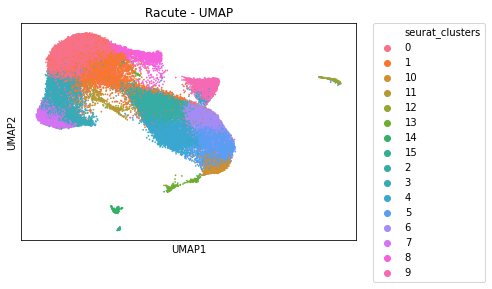

In [7]:
frame1 = sns.scatterplot(UMAP[:,0], UMAP[:,1], s=3, hue = clusters, linewidth = 0)
plt.title('Racute - UMAP')
#plt.xlim(-30000,25000)
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [8]:
data = scipy.sparse.csr_matrix.toarray(data)
pd_data = pd.DataFrame(data, index = labels, columns = genes)

In [9]:
pd_data

,CH17-224D4.2,JCHAIN,ACTG1,CH17-224D4.1,GAPDH,LGALS1,NKG7,S100A4,MZB1,AC233755.2,...,ZEB1,ARL6IP5,MIS18A,WASF1,CCT3,NIN,ADAMTS6,PARP3,SLF2,ODF3B
S24_AAACCTGAGTGGGATC-1,0.092013,2.135116,-0.010095,0.045330,1.914729,0.072396,0.185960,0.000799,-0.055338,0.256733,...,0.101551,0.171838,0.030246,0.110386,0.157922,0.019746,-0.019272,0.177451,1.337431,0.009606
S24_AAACCTGAGTGTTTGC-1,0.078875,2.733917,0.118035,0.081358,1.376654,0.163883,-0.129602,-0.001403,0.549058,1.596718,...,-0.013652,0.160698,0.025677,0.097620,0.222876,0.036151,0.164769,0.018872,0.168693,0.051709
S24_AAACCTGGTAACGACG-1,0.039302,2.672237,0.272721,0.116560,2.307124,0.042870,1.729167,0.002775,1.768905,1.448563,...,-0.324225,1.177135,-0.063811,0.058281,0.088279,0.033124,-0.040976,0.005047,0.123940,-0.089153
S24_AAACCTGGTCATATGC-1,1.904402,1.703234,0.586302,0.193373,2.174972,2.318781,1.338988,0.024275,-0.267455,1.940387,...,0.067416,1.300368,0.938656,-0.012067,0.015649,0.009906,-0.038719,0.145639,0.042811,0.046314
S24_AAACCTGGTGAACCTT-1,0.055113,0.866594,0.022771,0.030654,1.125972,-0.019397,-0.120617,-0.003610,-0.374593,-0.267864,...,0.264018,0.540664,0.016625,0.136447,0.065634,0.059552,-0.005762,0.280248,0.144085,0.021350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S407V2_TTTCCTCGTGAGCGAT-1,0.171635,1.694194,0.596882,0.067080,1.030179,0.093415,0.277454,0.013671,0.914299,0.993330,...,0.108119,0.418861,0.030726,0.112563,0.267022,0.037877,0.147117,0.303888,0.247164,0.018575
S407V2_TTTCCTCTCATGTCTT-1,0.078329,2.094930,0.698532,0.056623,1.398024,0.705305,0.402005,0.024873,0.824971,0.735397,...,0.234588,0.222913,-0.005892,0.103917,0.072645,-0.191650,0.071945,0.304452,0.223002,0.040788
S407V2_TTTGCGCGTAAGTTCC-1,0.108609,1.415471,0.488526,-0.047417,0.347866,0.096689,1.845390,0.005786,0.128943,0.414079,...,0.145924,0.135483,0.077768,0.038930,0.269389,0.127698,-0.009320,-0.281080,0.136484,-0.063173
S407V2_TTTGCGCGTTATCGGT-1,0.073990,2.069694,0.907136,0.091079,1.866892,0.407938,0.855715,0.007664,1.084101,1.069833,...,0.197212,0.440362,0.030430,0.124403,0.279868,0.052628,0.065302,0.349729,0.196284,0.065092


## Distance Matrix

In [10]:
from manifold_utils.mSVD import eigen_plot, eigen_calc_from_dist_mat, eps_projection

In [12]:
N, d = pd_data.shape
np_data = np.array(pd_data) 
dist_mat = euclidean_distances(np_data, np_data)

In [13]:
#dist_mat = np.zeros((N, N))

#for j in range(N):
#    for k in range(0,N):
#        if j != k:
#            dist_mat[j, k] = np.linalg.norm(np_data[j, :] - np_data[k, :])
            
            
#    if j % 1000 == 0:
#        print("J: "+repr(j))
#        print("N: "+repr(N))

In [14]:
#savetxt('dist_mat_Sconvalescent.csv', dist_mat, delimiter=',')

#dist_mat = pd.read_csv('dist_mat_Sconvalescent.csv', sep=",", header = None)
#dist_mat = np.array(dist_mat )

In [15]:
print(dist_mat.shape)

(50705, 50705)


## Witness complex

In [16]:
from time import time
import numpy as np
from tda_utils.density_filtration import sort_distances_per_point, indices_for_density_filtration
from tda_utils.witness_complex import *

dist_per_pt = sort_distances_per_point(dist_mat)

# Load in ILC data
sct_sparse = np_data
dist_mat = dist_mat
n, d = sct_sparse.shape
print("n = "+str(n))
print("d = "+str(d))
print("shape of dist_mat: "+str(dist_mat.shape))

# Load in distances per point
distances_per_point = dist_per_pt

# time computation of density filtrations
print("Timing computation of density filtrations...")
density_indices = dict()
density_filtrations = dict()
ks = [10, 100, 1000]
#      10000]
ps = [0.01, 0.05, 0.1, 0.2]
for k in ks:
    for p in ps:
        print("\tk = "+str(k)+", p = "+str(p)+":")
        start = time()
        indices = indices_for_density_filtration(distances_per_point, k, p)
        density_indices[(k, p)] = indices
        mask = np.zeros(n, dtype=bool)
        mask[indices] = True
        sqr_mask = np.outer(mask, mask)
        density_filtrations[(k, p)] = np.reshape(dist_mat[sqr_mask], (len(indices), len(indices)))
        print("\t"+str(time()-start)+" seconds\n")

print("Timing computation of landmarks...")
landmark_indices = dict()
landmark_mats = dict()
pps = [0.05, 0.1, 0.2]
for k in ks:
    for p in ps:
        for pp in pps:
            print("\tk = "+str(k)+", p = "+str(p)+", pp = "+str(pp)+":")
            start = time()
            landmark_indices[(k, p, pp)], landmark_mats[(k, p, pp)] = choose_landmarks(density_filtrations[(k, p)], pp)
            print("\t"+str(time()-start)+" seconds\n")

print("Printing numbers of landmarks...")
for k in ks:
    for p in ps:
        for pp in pps:
            toople = (k, p, pp)
            print(str(toople)+": "+str(len(landmark_indices[toople])))
            if toople == (1000, 0.2, 0.2):
                print("saving")
                landmark_inds = landmark_indices[toople]
                dense_inds = density_indices[(k, p)]
                true_inds = [dense_inds[ind] for ind in landmark_inds]
                print(true_inds)
                to_save = np.vstack([sct_sparse[ind, :] for ind in true_inds])
                np.save("Wilson_COVID_Sconvalescent_landmarks.npy", to_save)
                np.save("Wilson_COVID_Sconvalescent_landmark_indices.npy", true_inds)

n = 50705
d = 2000
shape of dist_mat: (50705, 50705)
Timing computation of density filtrations...
	k = 10, p = 0.01:
	2.379148006439209 seconds

	k = 10, p = 0.05:
	2.518221139907837 seconds

	k = 10, p = 0.1:
	2.980559825897217 seconds

	k = 10, p = 0.2:
	3.8778839111328125 seconds

	k = 100, p = 0.01:
	2.4278266429901123 seconds

	k = 100, p = 0.05:
	2.5273525714874268 seconds

	k = 100, p = 0.1:
	2.8232192993164062 seconds

	k = 100, p = 0.2:
	3.8701915740966797 seconds

	k = 1000, p = 0.01:
	2.4514904022216797 seconds

	k = 1000, p = 0.05:
	2.4881441593170166 seconds

	k = 1000, p = 0.1:
	2.764611005783081 seconds

	k = 1000, p = 0.2:
	3.8508315086364746 seconds

Timing computation of landmarks...
	k = 10, p = 0.01, pp = 0.05:
	0.0010001659393310547 seconds

	k = 10, p = 0.01, pp = 0.1:
	0.0 seconds

	k = 10, p = 0.01, pp = 0.2:
	0.0 seconds

	k = 10, p = 0.05, pp = 0.05:
	0.0030024051666259766 seconds

	k = 10, p = 0.05, pp = 0.1:
	0.0050013065338134766 seconds

	k = 10, p = 0.05,

## Visualize Landmarks

In [17]:
landmarks = np.load("Wilson_COVID_Sconvalescent_landmarks.npy")

landmarks = true_inds
print(true_inds)

[38299, 9519, 27046, 25965, 32999, 40719, 32916, 44379, 14525, 6765, 46318, 28697, 45055, 8602, 34347, 33138, 12202, 38562, 32903, 12666, 14116, 45454, 44583, 43510, 8567, 10019, 45356, 38873, 38039, 38297, 10797, 9769, 43630, 11328, 43402, 8598, 50522, 39001, 50698, 9706, 45489, 27944, 45156, 45233, 11512, 43969, 41887, 37747, 38558, 49993, 38470, 29099, 32888, 37486, 38051, 42553, 45703, 43906, 38420, 32753, 49306, 37762, 50570, 38389, 38706, 34107, 14696, 13384, 28916, 28813, 40353, 11962, 38496, 38267, 30755, 41144, 11508, 46322, 33762, 16600, 34276, 6816, 41878, 10690, 10032, 26817, 40536, 45561, 45719, 33111, 43397, 33099, 27463, 42058, 43928, 9915, 45374, 1639, 34105, 43462, 8591, 33564, 37814, 10510, 50187, 12505, 39216, 32551, 40075, 41316, 8774, 33335, 41877, 28415, 40889, 31393, 38889, 14460, 37420, 17273, 12842, 11216, 26314, 8623, 38726, 7724, 40383, 43685, 11315, 44831, 37630, 27965, 38651, 45311, 43415, 49700, 9567, 32664, 28355, 32612, 10184, 10135, 33786, 32108, 11954,

In [18]:
N, d = np_data.shape

UMAP = np.array(UMAP)
print(UMAP.shape)

UMAP_landmark = np.zeros((1,2))
data_landmark = np.zeros((1,genes.shape[0]))

#Going through all of the cells, if index in landmarks we should pull the associated gene expression data
for i in landmarks:
    next_cell = np_data[i,:]
    next_cell = np.reshape(next_cell, (1, genes.shape[0]))
    data_landmark = np.append(data_landmark, next_cell, axis = 0)
        
    next_embedding = UMAP[i,:]
    next_embedding = np.reshape(next_embedding, (1,2))
    UMAP_landmark = np.append(UMAP_landmark, next_embedding, axis = 0)

#To get the indices to work out I have a row of zeros at the top that I need to omit
data_landmark = data_landmark[1:, :]    
UMAP_landmark = UMAP_landmark[1:, :]

print(data_landmark.shape)
print(UMAP_landmark.shape)

(50705, 2)
(2028, 2000)
(2028, 2)


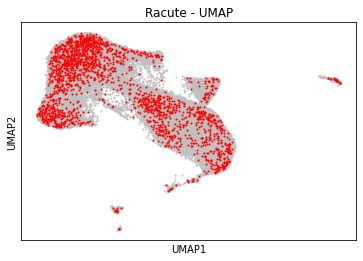

In [19]:
frame1 = plt.scatter(UMAP[:,0], UMAP[:,1], s=1, c = "silver")
frame1 = plt.scatter(UMAP_landmark[:,0], UMAP_landmark[:,1], s=1, c = "red")
plt.title('Racute - UMAP')
#plt.xlim(-30000,25000)
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.show()

## Persistence Diagrams

In [ ]:
rips = Rips()
diagrams = rips.fit_transform(np_data, distance_matrix=False, metric="euclidean")
rips.plot(diagrams)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [ ]:
rips = Rips()
diagrams = rips.fit_transform(data_landmark, distance_matrix=False, metric="euclidean")
rips.plot(diagrams)

## Eigen plots

In [20]:
from manifold_utils.mSVD import eigen_plot, eigen_calc_from_dist_mat, eps_projection, eigen_plot_numPoints, eigen_calc_from_dist_mat_withNumPoints
from manifold_utils.iga import chakraborty_express, iga

In [ ]:
for i in range(len(landmarks)):
    print(landmarks[i])
    center = landmarks[i]
    radii, eigval_list, eigvec_list = eigen_calc_from_dist_mat(np_data, dist_mat, center, radint = .01)

    rmin = radii[0]
    rmax = radii[-1]
    
    eigen_plot(eigval_list, radii, rmin, rmax)

38299
